In [48]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

P = np.load(os.path.join("results", "pitch_est_history.npy"))
S = np.load(os.path.join("results", "rls_history.npy"))
t = np.arange(P.shape[1])


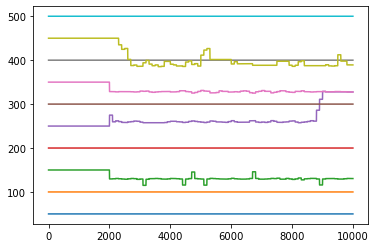

In [49]:
plt.plot(P.T)

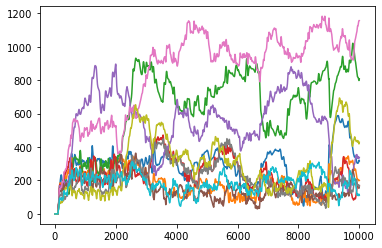

In [50]:
# View size of rls filter coeffs

Sr = S.reshape(3, 10, 10000, order="F")
Sr = np.linalg.norm(Sr, axis=0)
plt.plot(Sr.T)

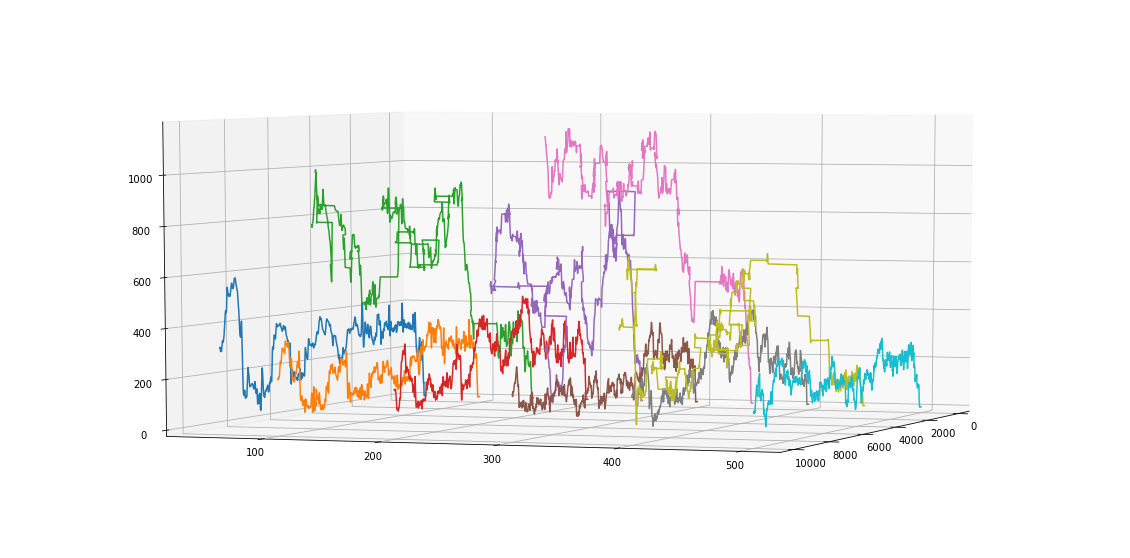

In [67]:
# Joint plot

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection="3d")
ax.view_init(elev=5, azim=20)
for i in range(10):
    ax.plot(t, P[i, :], Sr[i, :])